In [248]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [249]:
import warnings

warnings.filterwarnings('ignore')

In [250]:
df = pd.read_csv('/Users/piyushpriyadarshi/Documents/TISS ANALYTICS/Python_Projects/Weather Aus/weatherAUS.csv')

In [253]:
df.shape

(145460, 23)

In [254]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [255]:
col_names=df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [257]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [258]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [259]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [260]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [261]:
df[categorical].nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [262]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009

In [263]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/df.shape[0]) 

2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.020686
Nuriootpa 

In [264]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', (df[var].nunique()), ' labels')
    


Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


In [265]:
'''Find no. of numerical variables'''
num_var=[var for var in df.columns if df[var].dtype != 'O']
num_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [266]:
df[num_var].isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [267]:
'''removing na from numerical variables'''
for x in num_var:
    df[x].fillna(df[x].mean(),inplace = True)
    

In [268]:
df['Date'].dtypes


dtype('O')

In [269]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [270]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [271]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [272]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day']

0          1
1          2
2          3
3          4
4          5
          ..
145455    21
145456    22
145457    23
145458    24
145459    25
Name: Day, Length: 145460, dtype: int64

In [359]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [274]:
# drop the original Date variable

df[categorical].drop('Date', axis=1, inplace = True)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [276]:
df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [277]:
for x in categorical:
    print(df[x].mode())

0      2013-03-01
1      2013-03-02
2      2013-03-03
3      2013-03-04
4      2013-03-05
          ...    
1567   2017-06-20
1568   2017-06-21
1569   2017-06-22
1570   2017-06-23
1571   2017-06-24
Name: Date, Length: 1572, dtype: datetime64[ns]
0    Canberra
Name: Location, dtype: object
0    W
Name: WindGustDir, dtype: object
0    N
Name: WindDir9am, dtype: object
0    SE
Name: WindDir3pm, dtype: object
0    No
Name: RainToday, dtype: object
0    No
Name: RainTomorrow, dtype: object


In [278]:
for x in categorical:
    print(df[x].mode()[0])

2013-03-01 00:00:00
Canberra
W
N
SE
No
No


In [279]:
'''removing na from categorical variables'''
for x in categorical:
    df[x].fillna(df[x].mode()[0],inplace = True)

In [280]:
df['Location'].nunique()

49

In [281]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [282]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [283]:
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 16 labels


In [285]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [286]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

W      20241
SE      9418
N       9313
SSE     9216
E       9181
S       9168
WSW     9069
SW      8967
SSW     8736
WNW     8252
NW      8122
ENE     8104
ESE     7372
NE      7133
NNW     6620
NNE     6548
Name: WindGustDir, dtype: int64

In [287]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.isna().sum()

0

In [288]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [289]:
df.WindGustDir.nunique()

16

In [290]:
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [291]:
df['WindGustDir'].isna().sum()

0

In [292]:
df['WindGustDir'].value_counts()

W      20241
SE      9418
N       9313
SSE     9216
E       9181
S       9168
WSW     9069
SW      8967
SSW     8736
WNW     8252
NW      8122
ENE     8104
ESE     7372
NE      7133
NNW     6620
NNE     6548
Name: WindGustDir, dtype: int64

In [293]:
pd.get_dummies(df.WindGustDir, drop_first=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [294]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [295]:
df['WindDir9am'].nunique()

16

In [296]:
df['WindDir9am'].isna().sum()

0

In [297]:
df['WindDir9am'].value_counts()

N      22324
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [298]:
pd.get_dummies(df.WindDir9am, drop_first=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [299]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [300]:
df['WindDir3pm'].nunique()

16

In [301]:
df['WindDir3pm'].value_counts()

SE     15066
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [302]:
df['WindDir3pm'].isna().sum()

0

In [303]:
pd.get_dummies(df.WindDir3pm, drop_first=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [304]:
df.RainToday.unique()

array(['No', 'Yes'], dtype=object)

In [305]:
df.RainToday.nunique()

2

In [306]:
df.RainToday.value_counts()

No     113580
Yes     31880
Name: RainToday, dtype: int64

In [307]:
df.RainToday.isna().sum()

0

In [308]:
pd.get_dummies(df.RainToday, drop_first=True).head()

,Yes
0,0
1,0
2,0
3,0
4,0


In [309]:
pd.get_dummies(df.RainToday, drop_first=True).sum(axis=0)


Yes    31880
dtype: int64

In [310]:
'''Find no. of numerical variables'''
num_var=[var for var in df.columns if df[var].dtype != 'O']
num_var

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [311]:
len(num_var)

20

In [312]:
df[num_var].head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,2008-12-01,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,2008,12,1
1,2008-12-02,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,2008,12,2
2,2008-12-03,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,2008,12,3
3,2008-12-04,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,2008,12,4
4,2008-12-05,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,2008,12,5


In [313]:
df[num_var].isna().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [314]:
round(df[num_var].describe(),2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00,145460.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68,2012.77,6.40,15.71
std,6.37,7.09,8.38,3.16,2.73,13.12,8.86,8.72,18.85,20.47,6.73,6.66,2.27,2.09,6.45,6.85,2.54,3.43,8.79
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,2007.00,1.00,1.00
25%,7.70,18.00,0.00,4.00,7.61,31.00,7.00,13.00,57.00,37.00,1013.50,1011.10,3.00,4.00,12.30,16.70,2011.00,3.00,8.00
50%,12.10,22.70,0.00,5.47,7.61,39.00,13.00,18.66,69.00,51.54,1017.65,1015.26,4.45,4.51,16.80,21.40,2013.00,6.00,16.00
75%,16.80,28.20,1.00,5.47,8.70,46.00,19.00,24.00,83.00,65.00,1021.80,1019.40,6.00,6.00,21.50,26.20,2015.00,9.00,23.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,2017.00,12.00,31.00


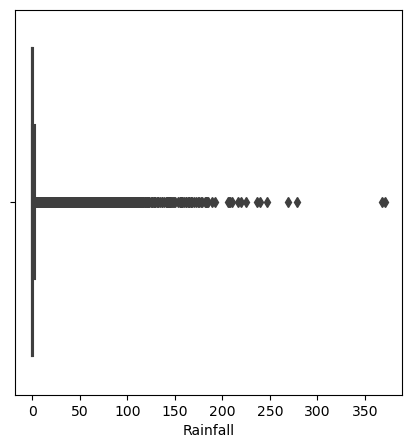

In [315]:
plt.figure(figsize=(5,5))
sns.boxplot(df['Rainfall'])
plt.show()

<AxesSubplot:xlabel='Rainfall'>

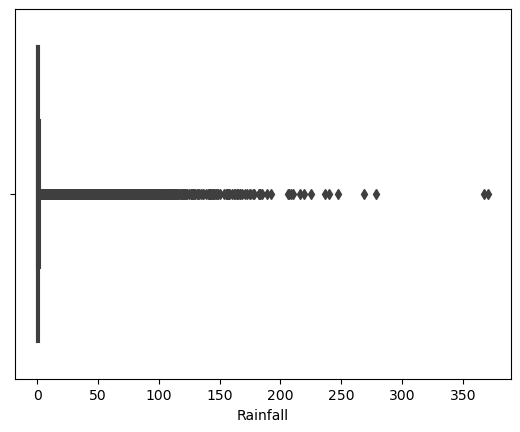

In [316]:
sns.boxplot(data=df , x= 'Rainfall')

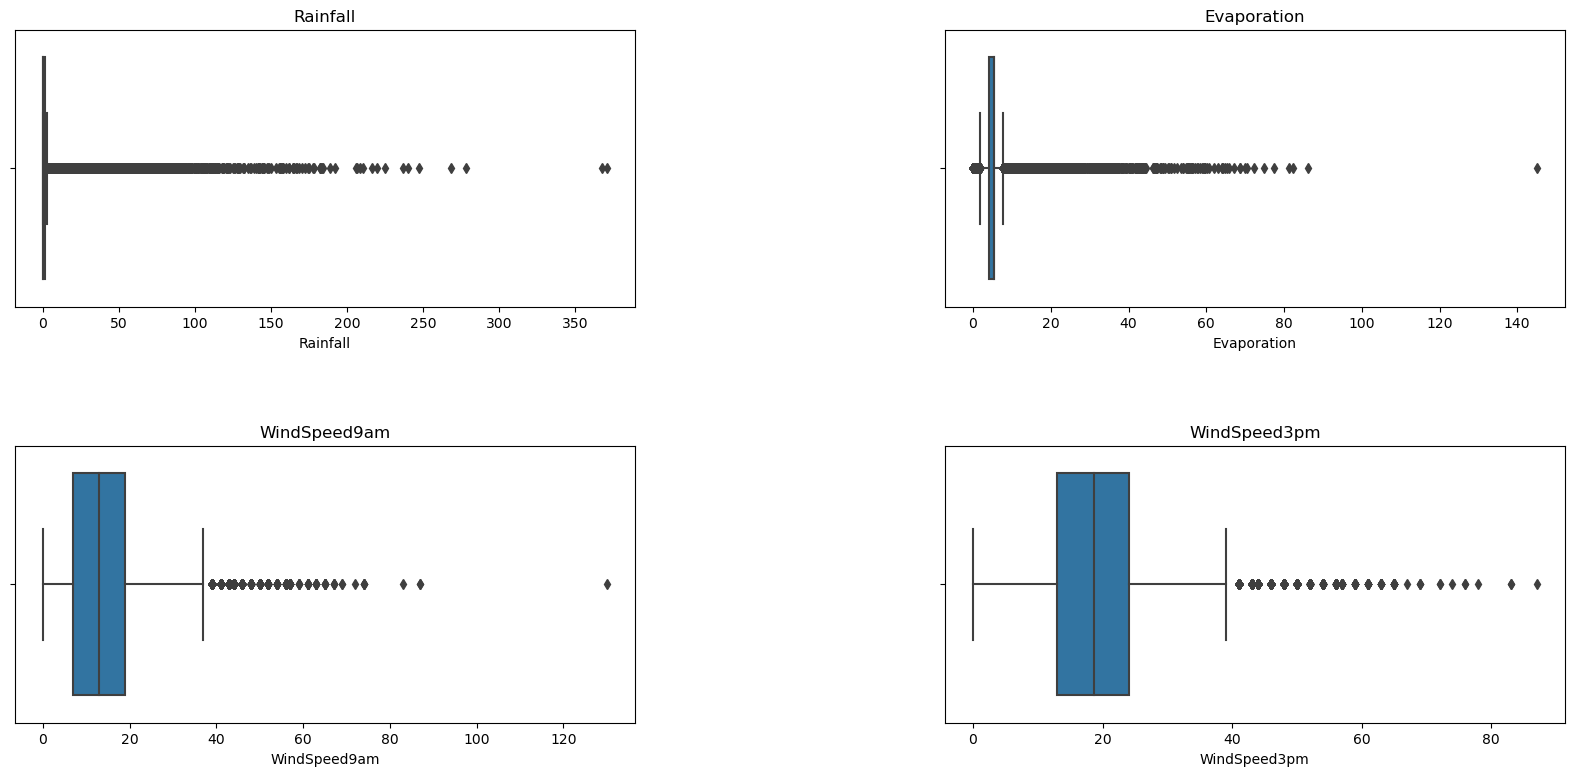

In [317]:
plt.figure(1 , figsize = (20 , 9))
box_trial=['Rainfall','Evaporation','WindSpeed9am','WindSpeed3pm']
n = 0
for x in box_trial:
    n += 1 
    plt.subplot(2 , 2 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = df[x])
    plt.title('{}'.format(x))
    
plt.show()

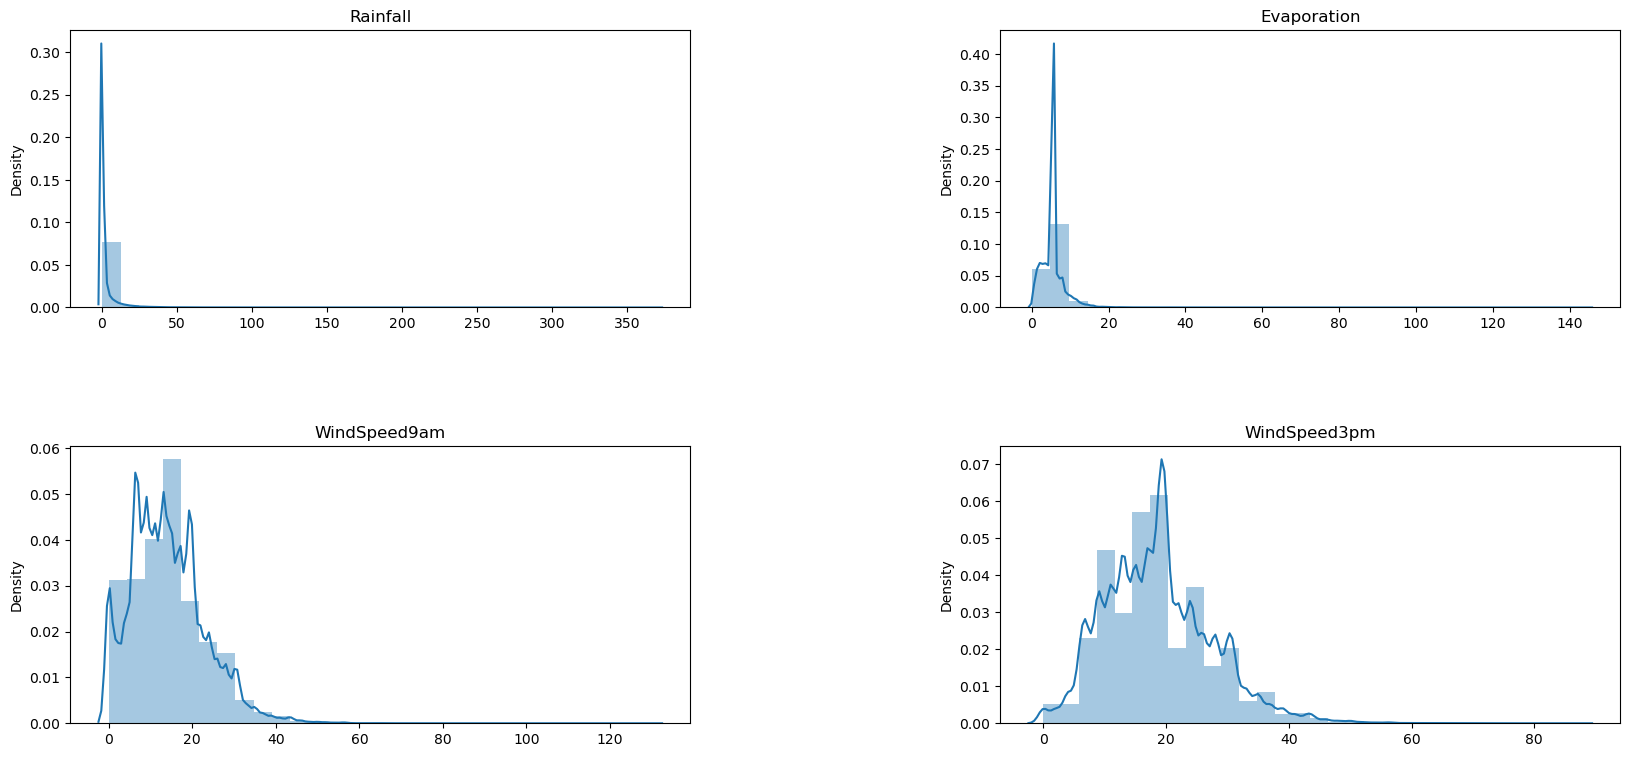

In [318]:
plt.figure(1 , figsize = (20 , 9))
box_trial=['Rainfall','Evaporation','WindSpeed9am','WindSpeed3pm']
n = 0
for x in box_trial:
    n += 1 
    plt.subplot(2 , 2 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(x = df[x],bins=30)
    plt.title('{}'.format(x))

plt.show()

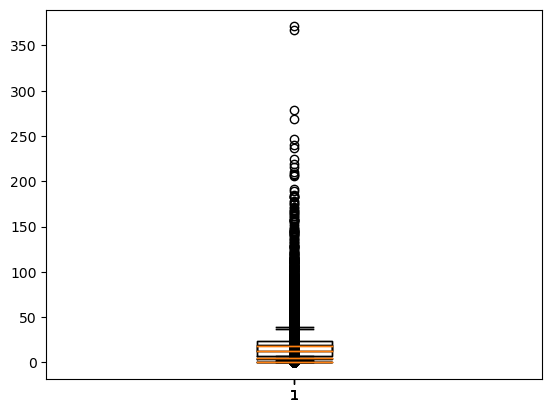

In [319]:
'''treating outliers '''
treating_feature = ['Rainfall','Evaporation','WindSpeed9am','WindSpeed3pm']

'''
upper outliers treatment - replacing with upper whisker
'''
for x in treating_feature:
    b = plt.boxplot(df[x])
    values = [item.get_ydata()[1] for item in b['whiskers']]
    upper_whisker = values[1]
    df[x][df[x] > upper_whisker] = upper_whisker

'''
lower outliers treatment - replacing with lower whisker
'''
treating_feature_lower = ['Rainfall','Evaporation','WindSpeed9am','WindSpeed3pm']

for x in treating_feature_lower:
    b = plt.boxplot(df[x])
    values = [item.get_ydata()[1] for item in b['whiskers']]
    lower_whisker = values[0]
    df[x][df[x] < lower_whisker] = lower_whisker

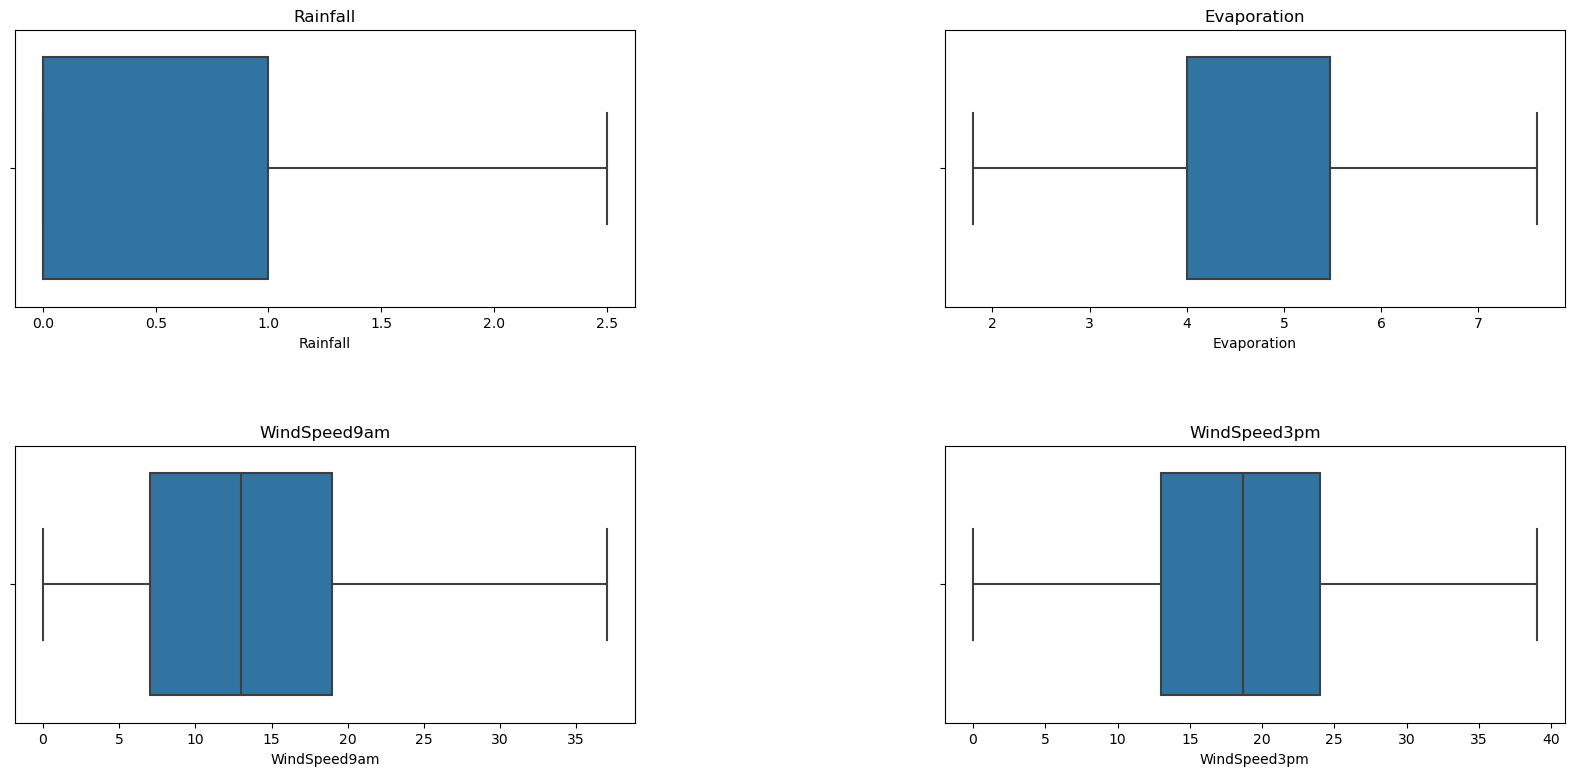

In [320]:
plt.figure(1 , figsize = (20 , 9))
box_trial=['Rainfall','Evaporation','WindSpeed9am','WindSpeed3pm']
n = 0
for x in box_trial:
    n += 1 
    plt.subplot(2 , 2 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = df[x])
    plt.title('{}'.format(x))
    
plt.show()

In [321]:

for x in categorical:
    print(df[x].mode())

0      2013-03-01
1      2013-03-02
2      2013-03-03
3      2013-03-04
4      2013-03-05
          ...    
1567   2017-06-20
1568   2017-06-21
1569   2017-06-22
1570   2017-06-23
1571   2017-06-24
Name: Date, Length: 1572, dtype: datetime64[ns]
0    Canberra
Name: Location, dtype: object
0    W
Name: WindGustDir, dtype: object
0    N
Name: WindDir9am, dtype: object
0    SE
Name: WindDir3pm, dtype: object
0    No
Name: RainToday, dtype: object
0    No
Name: RainTomorrow, dtype: object


In [322]:

for x in categorical:
    print(df[x].mode()[0])

2013-03-01 00:00:00
Canberra
W
N
SE
No
No


In [323]:
'''data preprocessing i.e data cleaning for categorical and numerical values'''

for x in categorical:
    df[x].fillna(df[x].mode()[0],inplace = True)

In [324]:
df[categorical].isna().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [325]:
for x in num_var :
    df[x].fillna(df[x].mean(),inplace=True)

In [326]:
df[num_var].isna().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [327]:
'''Create dummies (First Encode)'''
'''separate the X and Y'''
'''minmax scaler '''
'''Fit and train the model'''

'Fit and train the model'

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [329]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,0.614503,5.087086,7.611178,40.035230,13.952432,18.550007,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.683390,2012.769751,6.399615,15.712258
std,6.365750,7.088124,0.988409,1.695824,2.729486,13.118253,8.555347,8.376642,18.854765,20.471189,6.728467,6.663973,2.265604,2.092954,6.449221,6.850057,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,1.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.100000,22.700000,0.000000,5.468232,7.611178,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.800000,21.400000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,1.000000,5.468232,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,2.500000,7.600000,14.500000,135.000000,37.000000,39.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [330]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [331]:
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,2008,12,1
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,2008,12,2
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,2008,12,3
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,2008,12,4
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,2017,6,21
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,2017,6,22
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,2017,6,23
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,2017,6,24


In [332]:
y

0         No
1         No
2         No
3         No
4         No
          ..
145455    No
145456    No
145457    No
145458    No
145459    No
Name: RainTomorrow, Length: 145460, dtype: object

In [333]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [334]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((116368, 25), (29092, 25))

In [335]:
X_train.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
Year                      int64
Month                     int64
Day                       int64
dtype: object

In [336]:
# encode RainToday variable
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [337]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,2014-03-12,NorfolkIsland,18.8,23.7,0.2,5.000000,7.300000,ESE,52.0,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,2016-10-06,Watsonia,9.3,24.0,0.2,1.800000,10.900000,NE,48.0,NNW,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,2011-08-31,Perth,10.9,22.2,1.4,1.800000,9.600000,SW,26.0,N,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,2010-06-11,Darwin,19.3,29.9,0.0,7.600000,11.000000,ESE,43.0,ESE,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,2014-04-10,Albury,15.7,17.6,2.5,5.468232,7.611178,E,20.0,ESE,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


In [338]:
X_train = pd.concat([X_train[num_var], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [339]:
X_test = pd.concat([X_test[num_var], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)


In [340]:
X_train

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,2014-03-12,18.8,23.7,0.2,5.000000,7.300000,52.0,31.0,28.0,74.0,...,0,0,0,0,0,0,0,0,0,0
80735,2016-10-06,9.3,24.0,0.2,1.800000,10.900000,48.0,13.0,24.0,74.0,...,0,0,0,0,0,0,0,0,0,0
121764,2011-08-31,10.9,22.2,1.4,1.800000,9.600000,26.0,0.0,11.0,85.0,...,0,0,0,0,0,0,1,0,0,0
139821,2010-06-11,19.3,29.9,0.0,7.600000,11.000000,43.0,26.0,17.0,44.0,...,0,0,0,0,0,0,0,0,0,0
1867,2014-04-10,15.7,17.6,2.5,5.468232,7.611178,20.0,11.0,13.0,100.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,2015-12-20,17.8,38.1,0.0,7.600000,7.611178,39.0,7.0,13.0,61.0,...,0,0,0,0,0,0,0,0,0,0
97639,2012-03-11,12.5,27.3,0.0,5.468232,10.000000,30.0,0.0,13.0,60.0,...,0,0,0,0,0,0,0,0,1,0
95939,2016-06-10,17.0,29.8,0.0,5.600000,7.611178,22.0,4.0,13.0,77.0,...,0,0,0,0,0,0,0,0,0,0
117952,2009-11-20,11.9,22.0,2.5,6.200000,7.700000,35.0,19.0,24.0,55.0,...,0,0,0,0,0,0,0,0,1,0


In [341]:
X_test

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
138175,2014-12-03,21.9,39.4,1.6,7.600000,11.500000,57.00000,20.0,33.0,50.0,...,0,0,0,0,0,0,0,0,0,0
38638,2015-01-08,20.5,37.5,0.0,7.600000,8.400000,59.00000,17.0,20.0,47.0,...,0,0,0,0,0,0,0,0,0,0
124058,2009-08-16,5.1,17.2,0.2,5.468232,7.611178,50.00000,28.0,22.0,68.0,...,0,0,0,0,0,0,0,1,0,0
99214,2016-08-31,11.9,16.8,1.0,5.468232,7.611178,28.00000,11.0,13.0,80.0,...,0,0,0,0,0,0,1,0,0,0
25097,2011-08-28,7.5,21.3,0.0,5.468232,7.611178,15.00000,2.0,7.0,88.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133493,2010-03-08,18.2,24.4,2.5,5.468232,7.611178,44.00000,13.0,20.0,85.0,...,0,1,0,0,0,0,0,0,0,0
43818,2012-06-24,9.4,18.0,0.0,5.468232,7.611178,48.00000,26.0,17.0,54.0,...,0,0,0,0,0,0,0,0,0,1
28118,2011-09-09,10.6,15.4,2.5,1.800000,7.611178,28.00000,17.0,7.0,90.0,...,0,1,0,0,0,0,0,0,0,0
120179,2016-03-24,18.6,26.9,0.0,4.000000,7.200000,63.00000,28.0,24.0,67.0,...,0,0,0,0,0,0,0,0,0,0


In [342]:
for x in X_train.columns:
    print(x)

Date
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
Year
Month
Day
RainToday_0
RainToday_1
Adelaide
Albany
Albury
AliceSprings
BadgerysCreek
Ballarat
Bendigo
Brisbane
Cairns
Canberra
Cobar
CoffsHarbour
Dartmoor
Darwin
GoldCoast
Hobart
Katherine
Launceston
Melbourne
MelbourneAirport
Mildura
Moree
MountGambier
MountGinini
Newcastle
Nhil
NorahHead
NorfolkIsland
Nuriootpa
PearceRAAF
Penrith
Perth
PerthAirport
Portland
Richmond
Sale
SalmonGums
Sydney
SydneyAirport
Townsville
Tuggeranong
Uluru
WaggaWagga
Walpole
Watsonia
Williamtown
Witchcliffe
Wollongong
Woomera
E
ENE
ESE
N
NE
NNE
NNW
NW
S
SE
SSE
SSW
SW
W
WNW
WSW
E
ENE
ESE
N
NE
NNE
NNW
NW
S
SE
SSE
SSW
SW
W
WNW
WSW
E
ENE
ESE
N
NE
NNE
NNW
NW
S
SE
SSE
SSW
SW
W
WNW
WSW


In [343]:
# encode RainToday variable
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

ValueError: X does not contain the columns listed in cols

In [349]:
X_train.drop('Date',inplace=True,axis=1)

In [351]:
X_test.drop('Date',inplace=True,axis=1)

In [350]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,18.8,23.7,0.2,5.000000,7.300000,52.0,31.0,28.0,74.0,73.0,...,0,0,0,0,0,0,0,0,0,0
80735,9.3,24.0,0.2,1.800000,10.900000,48.0,13.0,24.0,74.0,55.0,...,0,0,0,0,0,0,0,0,0,0
121764,10.9,22.2,1.4,1.800000,9.600000,26.0,0.0,11.0,85.0,47.0,...,0,0,0,0,0,0,1,0,0,0
139821,19.3,29.9,0.0,7.600000,11.000000,43.0,26.0,17.0,44.0,37.0,...,0,0,0,0,0,0,0,0,0,0
1867,15.7,17.6,2.5,5.468232,7.611178,20.0,11.0,13.0,100.0,100.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,17.8,38.1,0.0,7.600000,7.611178,39.0,7.0,13.0,61.0,30.0,...,0,0,0,0,0,0,0,0,0,0
97639,12.5,27.3,0.0,5.468232,10.000000,30.0,0.0,13.0,60.0,32.0,...,0,0,0,0,0,0,0,0,1,0
95939,17.0,29.8,0.0,5.600000,7.611178,22.0,4.0,13.0,77.0,54.0,...,0,0,0,0,0,0,0,0,0,0
117952,11.9,22.0,2.5,6.200000,7.700000,35.0,19.0,24.0,55.0,49.0,...,0,0,0,0,0,0,0,0,1,0


In [352]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [353]:


# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [354]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [355]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.8088807 , 0.75086242, 0.80441869, ..., 0.43814477, 0.65875542,
       0.96837269])

In [356]:
# probability of getting output as 1 - rain
logreg.predict_proba(X_test)[:,1]

array([0.1911193 , 0.24913758, 0.19558131, ..., 0.56185523, 0.34124458,
       0.03162731])

In [357]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8474
